In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
arr_train_labels=np.array(mnist.train.labels)
arr_train_images=np.array(mnist.train.images)
arr_test_labels=np.array(mnist.test.labels)
arr_test_images=np.array(mnist.test.images)
#print(len(arr_train_labels))
#print(len(arr_train_images))
#print(len(arr_test_labels))
#print(len(arr_test_images))
list_x=[]
list_y=[]
c=0
print("training set")
# 4 is +1 and 9 is -1
for x in arr_train_labels:
    if(x[4]==1):
        list_x.append(arr_train_images[c])
        list_y.append(1)
    elif(x[9]==1):
        list_x.append(arr_train_images[c])
        list_y.append(-1)
    c=c+1
arr_train_x=np.array(list_x)
arr_train_y=np.array(list_y)
#print(len(arr_train_x[10]))
print(len(arr_train_x))
print(len(arr_train_y))
print("test set")
c=0
list_x=[]
list_y=[]
for x in arr_test_labels:
    if(x[4]==1):
        list_x.append(arr_test_images[c])
        list_y.append(1)
    elif(x[9]==1):
        list_x.append(arr_test_images[c])
        list_y.append(-1)
    c=c+1
arr_test_x=np.array(list_x)
arr_test_y=np.array(list_y)
print(len(arr_test_x))
print(len(arr_test_y))
print(len(arr_test_labels))
print(c)
print(arr_train_x.head())

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
training set
10761
10761
test set
1991
1991
10000
10000


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [155]:
#Perceptron Algorithm
import matplotlib.pyplot as plt
def perceptron(epochs):
    weights = np.array(np.zeros(shape=(1,784)))
    length=len(arr_train_x)
    acc=[]
    x=[]
    acc_test=[]
    x_test=[]
    c=0
    e=0
    acc_test.append(0)
    x_test.append(0)
    acc.append(0)
    x.append(0)
    while e<epochs:
        flag=1
        #print(e)
        i=0
        while i<length:
            c=c+1
            #print(c)
            #print np.vdot(trainset[0],weights[0])
            if arr_train_y[i]*(np.vdot(arr_train_x[i],weights))<=0 :
                flag=0
                weights=weights+np.array((arr_train_y[i]*arr_train_x[i]))
            i=i+1
        #print(weights)
        if flag==1:
            #print("HERE")
            break
        k=0
        count=0
        while k<length:
            if arr_train_y[k]*(np.vdot(arr_train_x[k],weights))<=0 :
                count=count+1
            k=k+1
        w=0
        test_count=0
        while w<len(arr_test_x):
            if arr_test_y[w]*(np.vdot(arr_test_x[w],weights))<=0 :
                test_count=test_count+1
            w=w+1
        acc.append((length-count)/length)
        acc_test.append((len(arr_test_x)-test_count)/len(arr_test_x))
        x.append(e+1)
        x_test.append(e+1)
        e=e+1
    print(weights)
    plt.plot(x,acc)
    plt.show()
    plt.plot(x_test,acc_test)
    plt.show()
    print("Accuracy"+str(acc_test[len(acc_test)-1]))
    w=0
    tn=0
    tp=0
    fp=0
    fn=0
    while w<len(arr_test_x):
        if (np.vdot(arr_test_x[w],weights))<=0 and arr_test_y[w]<=0:
            tn=tn+1
        elif (np.vdot(arr_test_x[w],weights))<=0 and arr_test_y[w]>0:
            fn=fn+1
        elif (np.vdot(arr_test_x[w],weights))>0 and arr_test_y[w]>0:
            tp=tp+1
        else:
            fp=fp+1
        w=w+1
    print("Confusion Matrix:")
    print("TP: "+str(tp))
    print("FP: "+str(fp))
    print("FN: "+str(fn))
    print("TN: "+str(tn))
    print("End of run")

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  

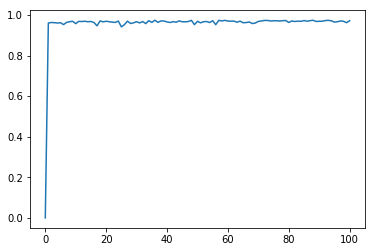

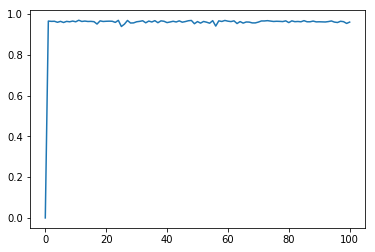

Accuracy0.9598191863385234
Confusion Matrix:
TP: 943
FP: 41
FN: 39
TN: 968
End of run


In [156]:
perceptron(100)

In [144]:
import math
def winnow(epochs):
    eta=0.5
    x=1/(2*784)
    acc_winn=[]
    x_winn=[]
    acc_winn_test=[]
    x_winn_test=[]
    acc_winn.append(0)
    x_winn.append(0)
    acc_winn_test.append(0)
    x_winn_test.append(0)
    #wp=np.array((1,784))
    wp=np.full(784,1)
    wn=np.full(784,1)
    #print(len(wp))
    length=len(arr_train_x)
    print(length)
    e=0
    #print(len(arr_train_y[0]))
    while(e<epochs):
        i=0
        while(i<length):
            if(arr_train_y[i]*(np.vdot(wp,arr_train_x[i])-np.vdot(wn,arr_train_x[i])))<=0:
                #wp=np.multiply(np.array(math.pow(math.e,0.1*np.vdot(arr_train_y[i],arr_train_x[i]))),np.array(wp))
                #print(i)
                arrp=np.array(arr_train_x[i])
                arrn=np.array(arr_train_x[i])
                j=0;
                while j<len(arrp):
                    arrp[j]=np.exp(eta*arr_train_y[i]*arrp[j])
                    #print(-1*0.1*arr_train_y[i]*arrn[j])
                    arrn[j]=np.exp(-1*eta*arr_train_y[i]*arrn[j])
                    j=j+1
                #print(len(wp))
                #print(len(arrp))
                j=0;
                while j<len(arrp):
                    wp[j]=wp[j]*arrp[j]
                    wn[j]=wn[j]*arrn[j]
                    j=j+1
                #print(wp)
                j=0
                sum=0
                while j<len(wp):
                    sum=sum+wp[j]+wn[j]
                    j=j+1
                wp=wp/sum
                wn=wn/sum
            i=i+1
        #print(wp)
        #print(wn)
        count=0
        i=0
        while i<length:
            if(arr_train_y[i]*(np.vdot(wp,arr_train_x[i])-np.vdot(wn,arr_train_x[i])))<=0:
                count=count+1
            i=i+1
        acc_winn.append((length-count)/length)
        x_winn.append(e+1)
        i=0
        test_count=0
        while i<len(arr_test_x):
            if(arr_test_y[i]*(np.vdot(wp,arr_test_x[i])-np.vdot(wn,arr_test_x[i])))<=0:
                test_count=test_count+1
            i=i+1
        acc_winn_test.append((len(arr_test_x)-test_count)/len(arr_test_x))
        x_winn_test.append(e+1)
        e=e+1
    print(wp)
    print(wn)
    print("Training Accuracy")
    plt.plot(x_winn,acc_winn)
    plt.show()
    print("Test Accuracy")
    plt.plot(x_winn_test,acc_winn_test)
    plt.show()
    w=0
    tn=0
    tp=0
    fp=0
    fn=0
    while w<len(arr_test_x):
        if (np.vdot(arr_test_x[w],weights))<=0 and arr_test_y[w]<=0:
            tn=tn+1
        elif (np.vdot(arr_test_x[w],weights))<=0 and arr_test_y[w]>0:
            fn=fn+1
        elif (np.vdot(arr_test_x[w],weights))>0 and arr_test_y[w]>0:
            tp=tp+1
        else:
            fp=fp+1
        w=w+1
    print("Confusion Matrix:")
    print("TP: "+str(tp))
    print("FP: "+str(fp))
    print("FN: "+str(fn))
    print("TN: "+str(tn))
    print("End of run")
    print("End of run")

10761
[  1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.50922858e-06   2.07351613e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.42022368e-06   1.42022368e-06   1.42022368e-06
   1.42022368e-06   1.420223

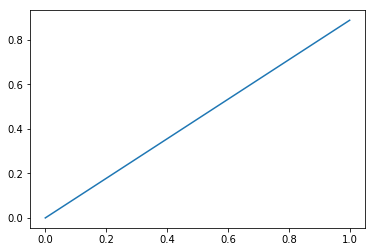

Test Accuracy


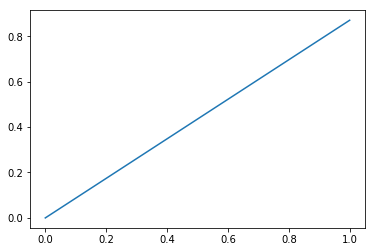

NameError: name 'weights' is not defined

In [145]:
winnow(1)

In [165]:
import math
def winnow(epochs):
    eta=0.001
    x=1/(2*784)
    acc_winn=[]
    x_winn=[]
    acc_winn_test=[]
    x_winn_test=[]
    acc_winn.append(0)
    x_winn.append(0)
    acc_winn_test.append(0)
    x_winn_test.append(0)
    #wp=np.array((1,784))
    wp=np.full(784,1)
    wn=np.full(784,1)
    #print(len(wp))
    length=len(arr_train_x)
    print(length)
    e=0
    #print(len(arr_train_y[0]))
    while(e<epochs):
        i=0
        while(i<length):
            if(arr_train_y[i]*(np.vdot(wp,arr_train_x[i])-np.vdot(wn,arr_train_x[i])))<=0:
                #wp=np.multiply(np.array(math.pow(math.e,0.1*np.vdot(arr_train_y[i],arr_train_x[i]))),np.array(wp))
                #print(i)
                arrp=np.array(arr_train_x[i])
                arrn=np.array(arr_train_x[i])
                arrp=arr_train_y[i]*arrp
                arrp=np.exp(eta*arrp)
                arrn=arr_train_y[i]*arrn
                arrn=np.exp(-1*eta*arrn)
                wp=wp*arrp
                wn=wn*arrn
                j=0;
                #while j<len(arrp):
                #    arrp[j]=np.exp(eta*arr_train_y[i]*arrp[j])
                #    #print(-1*0.1*arr_train_y[i]*arrn[j])
                #    arrn[j]=np.exp(-1*eta*arr_train_y[i]*arrn[j])
                #    j=j+1
                #print(len(wp))
                #print(len(arrp))
                #j=0;
                #while j<len(arrp):
                #    wp[j]=wp[j]*arrp[j]
                #    wn[j]=wn[j]*arrn[j]
                #    j=j+1
                #print(wp)
                j=0
                sum=0
                while j<len(wp):
                    sum=sum+wp[j]+wn[j]
                    j=j+1
                wp=wp/sum
                wn=wn/sum
            i=i+1
        #print(wp)
        #print(wn)
        count=0
        i=0
        while i<length:
            if(arr_train_y[i]*(np.vdot(wp,arr_train_x[i])-np.vdot(wn,arr_train_x[i])))<=0:
                count=count+1
            i=i+1
        acc_winn.append((length-count)/length)
        x_winn.append(e+1)
        i=0
        test_count=0
        while i<len(arr_test_x):
            if(arr_test_y[i]*(np.vdot(wp,arr_test_x[i])-np.vdot(wn,arr_test_x[i])))<=0:
                test_count=test_count+1
            i=i+1
        acc_winn_test.append((len(arr_test_x)-test_count)/len(arr_test_x))
        x_winn_test.append(e+1)
        e=e+1
    print(wp)
    print(wn)
    print("Training Accuracy")
    plt.plot(x_winn,acc_winn)
    plt.show()
    print("Test Accuracy"+str(acc_winn_test[len(acc_winn_test)-1]))
    plt.plot(x_winn_test,acc_winn_test)
    plt.show()
    w=0
    tn=0
    tp=0
    fp=0
    fn=0
    while w<len(arr_test_x):
        if(np.vdot(wp,arr_test_x[w])-np.vdot(wn,arr_test_x[w]))<=0 and arr_test_y[w]<=0:
            tn=tn+1
        elif (np.vdot(wp,arr_test_x[w])-np.vdot(wn,arr_test_x[w]))<=0 and arr_test_y[w]>0:
            fn=fn+1
        elif (np.vdot(wp,arr_test_x[w])-np.vdot(wn,arr_test_x[w]))>0 and arr_test_y[w]>0:
            tp=tp+1
        else:
            fp=fp+1
        w=w+1
    print("Confusion Matrix:")
    print("TP: "+str(tp))
    print("FP: "+str(fp))
    print("FN: "+str(fn))
    print("TN: "+str(tn))
    print("End of run")
    print("End of run")

10761
[ 0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.00063769  0.00063817  0.0006379
  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753  0.00063753
  0.00063753  0.00063753  0.00063753  0.000637

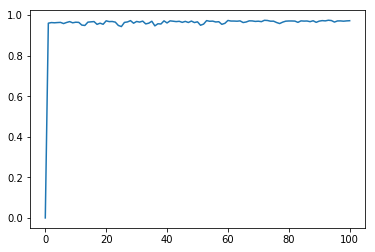

Test Accuracy0.9648417880462079


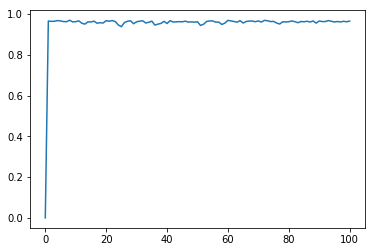

Confusion Matrix:
TP: 944
FP: 32
FN: 38
TN: 977
End of run
End of run


In [166]:
winnow(100)